## Fake data creation module showcase 

In [10]:
import os, sys
import numpy as np
from pybird.fake import Fake

## Define Fiducial Cosmology

We start with a fiducial cosmology that will be used to generate the synthetic data. This represents our "true" cosmological model.


In [11]:
# Define fiducial cosmology
fiducial_cosmo = {'omega_b': 0.02235, 'omega_cdm': 0.120, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}


## Set Up File Paths

Define the directory structure for saving the generated fake data and configuration files.


In [12]:
# Set up file paths
rootdir = "../"
fakedir = os.path.join(rootdir, 'data', 'fake')
fakeconfigdir = os.path.join(fakedir, 'likelihood_config')
template_configfile = os.path.join(fakeconfigdir, 'set_fake_desi_pk_wc.yaml')


## Define Survey Parameters

We define survey specifications for different DESI configurations. These parameters determine:

- **Redshift ranges** for each sky patch
- **Effective volumes** for covariance calculations
- **Sky coverage** in square degrees
- **Power spectrum normalization** (P0) for each tracer

The DESI_Y6 configuration represents the full 6-year survey with 7 sky patches covering different redshift ranges and tracers.


In [13]:
# Define survey parameters
DESI_Y1 = {
    'n_sky': 6, 
    'zmin': [.1, .4, .6, .8, 1.1, .8],
    'zmax': [.4, .6, .8, 1.1, 1.6, 2.1],
    'zeff': [0.295, 0.51, 0.706, 0.930, 1.317, 1.491],
    'Veff': np.array([1.7, 2.6, 4., 5., 2.7, 1.5])*1.e9, # Mpc^3
    'degsq': [7473, 5740, 5740, 5740, 5924, 7249], # BGS, LR1, LRG2, LRG3, ELG2, QSO
    'P0': np.array([9.2, 8.9, 8.9, 8.4, 2.9, 5.])*1.e3 # (Mpc/h)^3
}

DESI_Y6 = {
    'n_sky': 7, 
    'zmin': [.1, .4, .6, .8, .8, 1.1, .8],
    'zmax': [.4, .6, .8, 1.1, 1.1, 1.6, 2.1],
    'zeff': [0.295, 0.51, 0.706, 0.930, 0.930, 1.317, 1.491],
    'Veff': np.array([4., 8., 12., 15., 8., 12., 4.])*1.e9, # Mpc^3
    'degsq': [14000, 14000, 14000, 14000, 14000, 14000, 14000], 
    'P0': np.array([9.2, 8.9, 8.9, 8.4, 8.4, 2.9, 5.])*1.e3 # (Mpc/h)^3
}

s = DESI_Y6


## Initialize the Fake Data Generator

The `Fake` class is initialized with:

- **Survey parameters**: Redshift ranges, volumes, sky coverage
- **Fiducial cosmology**: The "true" cosmological model
- **Boltzmann solver**: CLASS backend for computing linear power spectra (could be switched to e.g. symbolic)
- **k-range**: Power spectrum wavenumber range and binning
- **Output settings**: File paths and names

The class automatically:
- Sets up PyBird correlators for each sky patch
- Computes fiducial EFT nuisance parameters
- Prepares configuration files for analysis


In [14]:
# Initialize the Fake data generator, let sue the internal Symbolic method for generating Pk_lin!
F = Fake(
    s['n_sky'], s['zmin'], s['zmax'], s['zeff'], s['Veff'], s['degsq'], s['P0'], 
    fiducial_cosmo, likelihood_config_template_file=template_configfile, fiducial_nuisance=None, boltzmann='Symbolic',
    Omega_m_fid=0.310, kmin=0.005, kmax=0.4, dk=0.01, 
    fake_data_filename='fake_desi_pk_wc', path_to_data=fakedir, 
    fake_likelihood_config_filename='fake_desi_pk_wc', path_to_config=fakeconfigdir
)


jax: on


ERROR:2025-07-28 14:50:43,819:jax._src.xla_bridge:647: Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/cluster/project/refregier/areeves/pybird_clean/lib/python3.11/site-packages/jax/_src/xla_bridge.py", line 645, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/cluster/project/refregier/areeves/pybird_clean/lib/python3.11/site-packages/jax_plugins/xla_cuda12/__init__.py", line 103, in initialize
    triton.register_compilation_handler(
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'jax._src.lib.triton' has no attribute 'register_compilation_handler'


No fiducial EFT parameters specified, using default ones


## Generate Fake Data

The `set()` method generates the synthetic data by:

1. **Computing theoretical power spectra** for each sky patch using EFT of LSS
2. **Generating covariance matrices** based on survey specifications and shot noise
3. **Saving data to HDF5 files** in the standard PyBird format
4. **Creating configuration files** for likelihood analysis

The generated data includes:
- Power spectrum multipoles (monopole, quadrupole, hexadecapole)
- Realistic covariance matrices
- Survey-specific parameters (redshift, volume, etc.)


In [15]:
# Generate the fake data
F.set()


bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2': -0.8141, 'ce0': 0.0, 'ce1': 0.0, 'ce2': -1.6279}
bsky[i] {'b1': 1.9542, 'c2': 0.5902, 'c4': 0.0, 'b3': -0.3686, 'cct': 0.1843, 'cr1': -0.8477, 'cr2':

## Test the Generated Data and Recover Parameters 

This is an important validation step. The `test()` method validates the generated data by:

1. **Running a likelihood analysis** on the fake data
2. **Performing parameter fitting** to recover the fiducial EFT parameters
3. **Computing goodness-of-fit statistics** (χ², p-value)

**Since we know the true parameters, we expect to recover them with high precision.** This demonstrates that:
- The synthetic data is consistent with the input model
- The analysis pipeline is working correctly

If all is working well the minimization should achieve χ² ≈ 0 and recover parameters to machine precision.


In [16]:
# Test the generated data and recover parameters
F.test()


no run_config dict provided, using default testing option
free_cosmo_name: []
fiducial_cosmo: {'omega_b': 0.02235, 'omega_cdm': 0.12, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}
cosmo_prior: False
ext_probe: False
ext_loglkl: None
measure: False
taylor_measure: False
debiasing: False
hessian_type: None
vectorize: False
taylor: False
jax_jit: True
order: 3
boltzmann: Symbolic
jax: on
reading data file: ../data/fake/fake_desi_pk_wc.h5
-----------------------
sky: sky_1
output: bPk
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.2, 0.2, 0.2]
-----------------------
-----------------------
sky: sky_2
output: bPk
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.2, 0.2, 0.2]
-----------------------
-----------------------
sky: sky_3
output: bPk
multipole: 3
min bound (per multipole): [0.01, 0.01, 0.01]
max bound (per multipole): [0.2, 0.2, 0.2]
-----------------------
-----------------------
sky: sky_4
outp

## Save Results

Save the likelihood results to files for further analysis.


In [17]:
# Save the results
F.R.I.L.write()


## Visualization and Analysis

Now let's create plots to visualize the generated fake data and analyze the parameter recovery.


In [18]:
# Import plotting libraries for visualization
import matplotlib.pyplot as plt
import h5py
from matplotlib import rcParams

# Set up plotting style
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (12, 8)
plt.style.use('default')

# Colors for different multipoles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
multipole_labels = ['Monopole (ℓ=0)', 'Quadrupole (ℓ=2)', 'Hexadecapole (ℓ=4)']


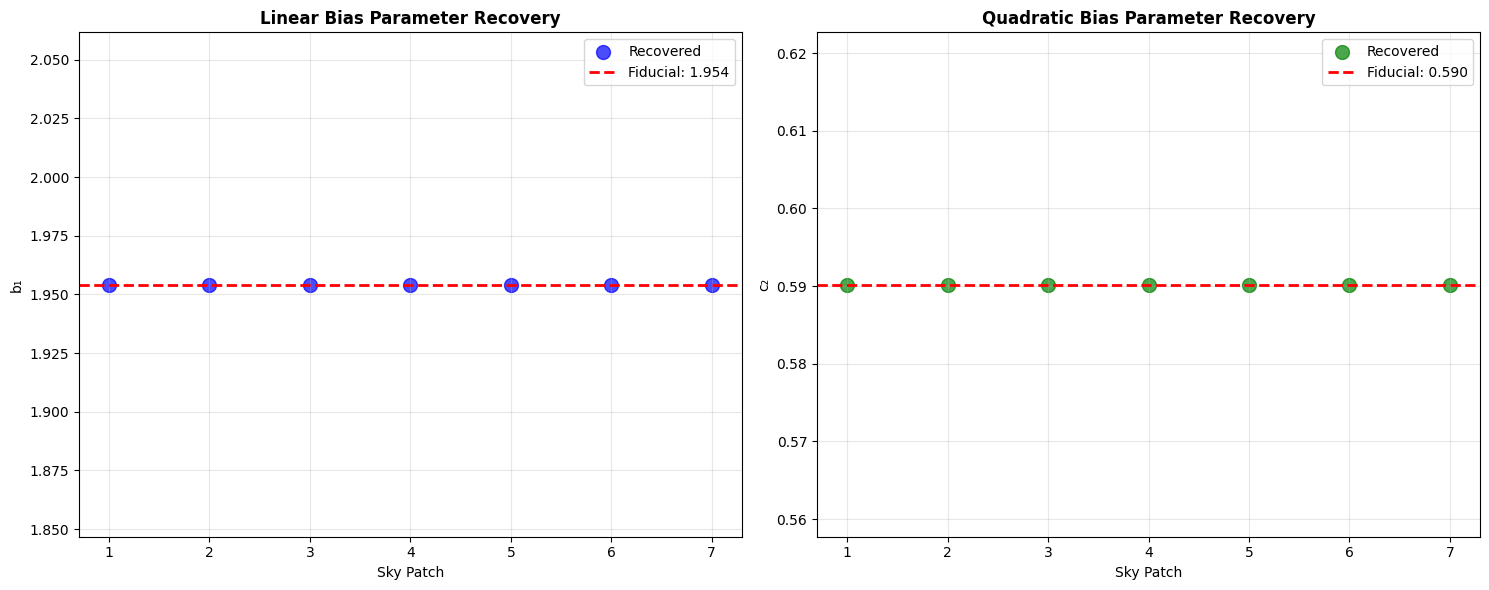

PARAMETER RECOVERY STATISTICS:
b₁ fiducial: 1.954200
b₁ recovered: 1.954200 ± 0.000000
b₁ fractional error: 0.0000%

c₂ fiducial: 0.590200
c₂ recovered: 0.590200 ± 0.000000
c₂ fractional error: 0.0000%


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Get the best-fit parameters from the test
bestfit_params, paramnames = F.R.I.get_maxp()[1], F.R.I.get_maxp()[2]
fiducial_params = F.fiducial_nuisance[0]  # Same for all skies in this case

# Extract b1 and c2 parameters for each sky
b1_recovered = []
c2_recovered = []
b1_fiducial = fiducial_params['b1']
c2_fiducial = fiducial_params['c2']

for i in range(s['n_sky']):
    b1_recovered.append(bestfit_params[paramnames.index(f'b1_{i+1}')])
    c2_recovered.append(bestfit_params[paramnames.index(f'c2_{i+1}')])

b1_recovered = np.array(b1_recovered)
c2_recovered = np.array(c2_recovered)

ax1.scatter(range(1, s['n_sky']+1), b1_recovered, s=100, alpha=0.7, c='blue', label='Recovered')
ax1.axhline(y=b1_fiducial, color='red', linestyle='--', linewidth=2, label=f'Fiducial: {b1_fiducial:.3f}')
ax1.set_xlabel('Sky Patch')
ax1.set_ylabel('b₁')
ax1.set_title('Linear Bias Parameter Recovery', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.scatter(range(1, s['n_sky']+1), c2_recovered, s=100, alpha=0.7, c='green', label='Recovered')
ax2.axhline(y=c2_fiducial, color='red', linestyle='--', linewidth=2, label=f'Fiducial: {c2_fiducial:.3f}')
ax2.set_xlabel('Sky Patch')
ax2.set_ylabel('c₂')
ax2.set_title('Quadratic Bias Parameter Recovery', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("PARAMETER RECOVERY STATISTICS:")
print("=" * 50)
print(f"b₁ fiducial: {b1_fiducial:.6f}")
print(f"b₁ recovered: {b1_recovered.mean():.6f} ± {b1_recovered.std():.6f}")
print(f"b₁ fractional error: {np.abs(b1_recovered - b1_fiducial).mean()/b1_fiducial*100:.4f}%")
print(f"")
print(f"c₂ fiducial: {c2_fiducial:.6f}")
print(f"c₂ recovered: {c2_recovered.mean():.6f} ± {c2_recovered.std():.6f}")
print(f"c₂ fractional error: {np.abs(c2_recovered - c2_fiducial).mean()/c2_fiducial*100:.4f}%")
print("=" * 50)

### Load and Examine the Generated Data

Let's read the generated HDF5 file to see what data was created.


In [20]:
# Load and examine the generated data
fake_data_file = os.path.join(fakedir, 'fake_desi_pk_wc.h5')

with h5py.File(fake_data_file, 'r') as f:
    print("Generated data structure:")
    print(list(f.keys()))
    
    sky1 = f['sky_1']
    print(f"\nSky 1 data structure:")
    print(list(sky1.keys()))
    
    pk_data = sky1['bPk']
    print(f"\nPower spectrum data structure:")
    print(list(pk_data.keys()))
    
    k_values = pk_data['x'][:]  
    pk_monopole = pk_data['l0'][:] 
    pk_quadrupole = pk_data['l2'][:]  
    pk_hexadecapole = pk_data['l4'][:]  
    cov_matrix = pk_data['cov'][:]
    
    print(f"\nData dimensions:")
    print(f"  k values: {k_values.shape}")
    print(f"  P0(k) monopole: {pk_monopole.shape}")
    print(f"  P2(k) quadrupole: {pk_quadrupole.shape}")
    print(f"  P4(k) hexadecapole: {pk_hexadecapole.shape}")
    print(f"  Covariance matrix: {cov_matrix.shape}")
    print(f"  k range: {k_values.min():.3f} to {k_values.max():.3f} h/Mpc")
    print(f"  Number of k bins: {len(k_values)}")
    print(f"  Multipole count: {pk_data['multipole'][()]}")


Generated data structure:
['sky_1', 'sky_2', 'sky_3', 'sky_4', 'sky_5', 'sky_6', 'sky_7']

Sky 1 data structure:
['bPk', 'fid', 'z']

Power spectrum data structure:
['binsize', 'cov', 'l0', 'l2', 'l4', 'multipole', 'nsims', 'survey_mask', 'x']

Data dimensions:
  k values: (40,)
  P0(k) monopole: (40,)
  P2(k) quadrupole: (40,)
  P4(k) hexadecapole: (40,)
  Covariance matrix: (120, 120)
  k range: 0.005 to 0.395 h/Mpc
  Number of k bins: 40
  Multipole count: 3


### Plot Power Spectrum Multipoles

Visualize the power spectrum multipoles for different sky patches to see how they vary with redshift.


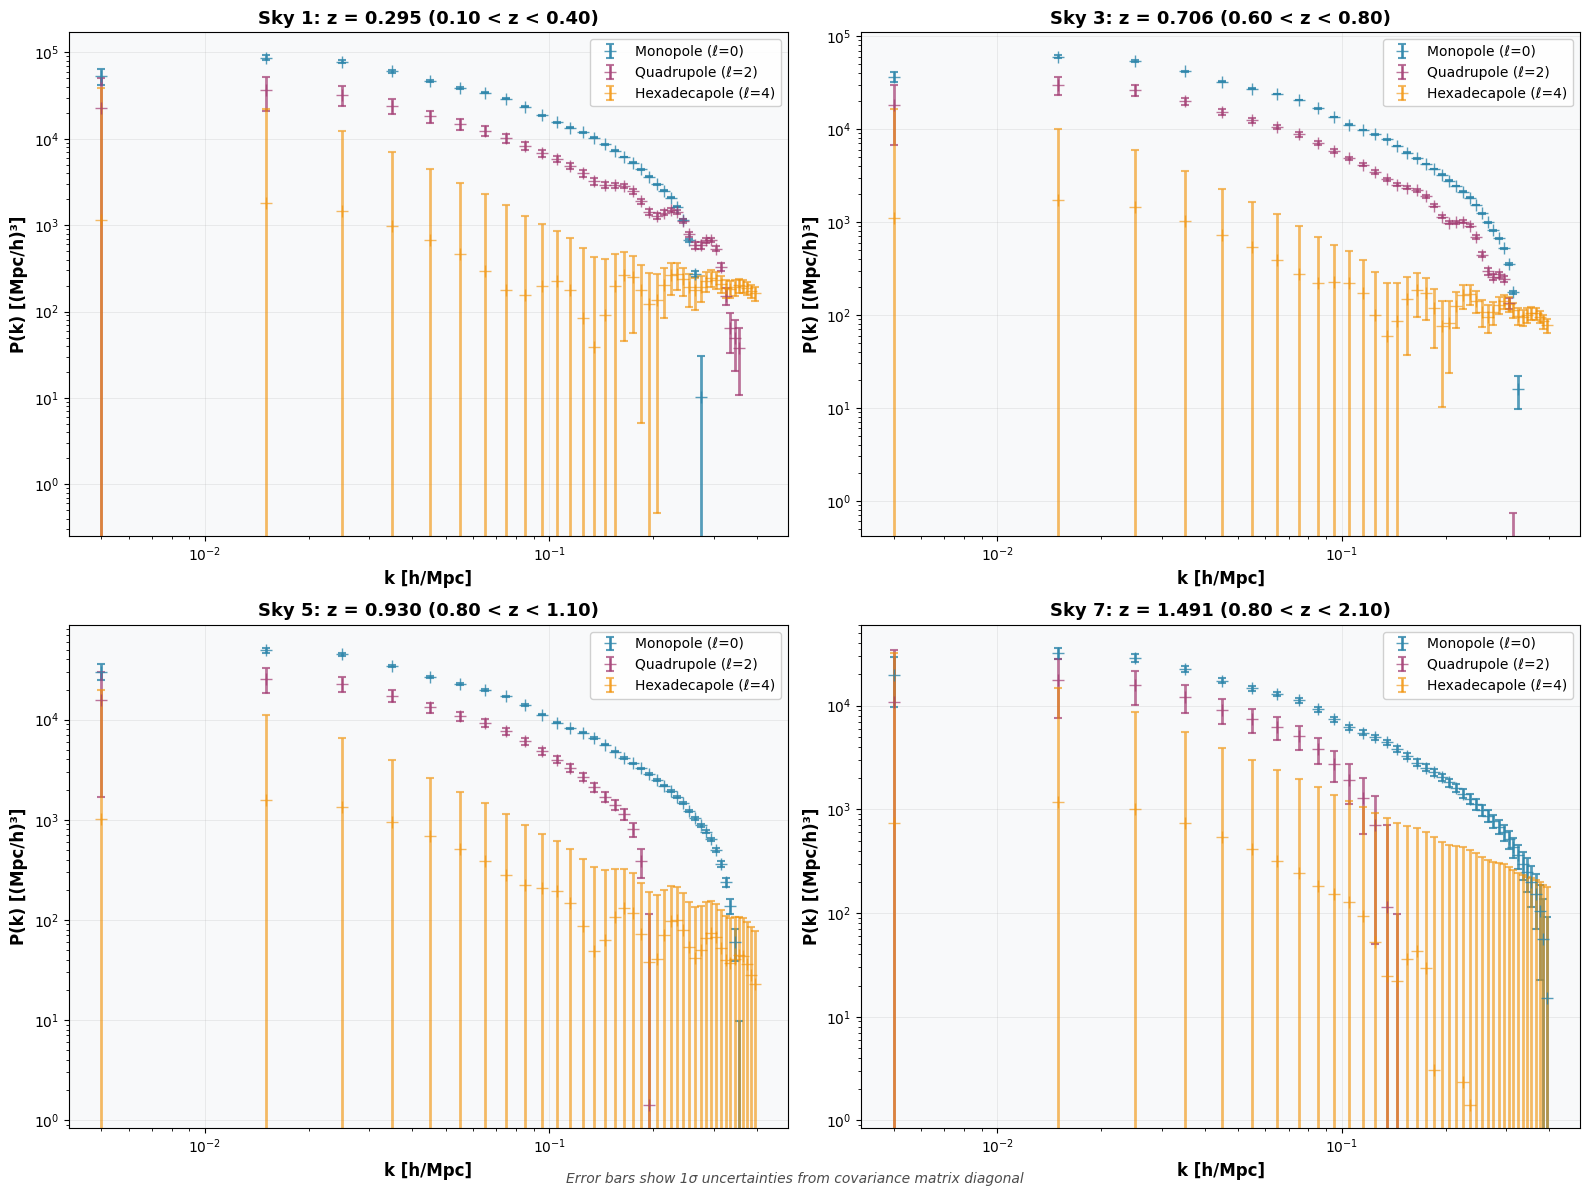

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['#2E86AB', '#A23B72', '#F18F01'] 
multipole_labels = ['Monopole (ℓ=0)', 'Quadrupole (ℓ=2)', 'Hexadecapole (ℓ=4)']
linestyles = ['-', '--', '-.']
alphas = [0.8, 0.7, 0.6]

fake_data_file = os.path.join(fakedir, 'fake_desi_pk_wc.h5')

with h5py.File(fake_data_file, 'r') as f:
    # Plot representative sky patches with different redshift ranges
    sky_indices = [0, 2, 4, 6]  # Different redshift ranges
    
    for i, sky_idx in enumerate(sky_indices):
        sky_key = f'sky_{sky_idx + 1}'
        sky_data = f[sky_key]
        
        # Get redshift information
        z_eff = sky_data['z']['eff'][()]
        z_min = sky_data['z']['min'][()]
        z_max = sky_data['z']['max'][()]
        
        k = sky_data['bPk']['x'][:]  
        pk_monopole = sky_data['bPk']['l0'][:]    
        pk_quadrupole = sky_data['bPk']['l2'][:]  
        pk_hexadecapole = sky_data['bPk']['l4'][:] 
        
        cov = sky_data['bPk']['cov'][:]
        n_k = len(k)
        
        err_monopole = np.sqrt(np.diag(cov)[:n_k])
        err_quadrupole = np.sqrt(np.diag(cov)[n_k:2*n_k])
        err_hexadecapole = np.sqrt(np.diag(cov)[2*n_k:3*n_k])
        
        pk_data = [pk_monopole, pk_quadrupole, pk_hexadecapole]
        err_data = [err_monopole, err_quadrupole, err_hexadecapole]
        
        for j, (pk, err, color, label, style, alpha) in enumerate(zip(
            pk_data, err_data, colors, multipole_labels, linestyles, alphas)):
            
            axes[i].errorbar(k, pk, yerr=err, color=color, label=label, 
                           fmt='+', markersize=8, linewidth=2, 
                           capsize=3, capthick=1.5, alpha=alpha)
        
        axes[i].set_xlabel('k [h/Mpc]', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('P(k) [(Mpc/h)³]', fontsize=12, fontweight='bold')
        axes[i].set_title(f'Sky {sky_idx + 1}: z = {z_eff:.3f} ({z_min:.2f} < z < {z_max:.2f})', 
                         fontsize=13, fontweight='bold')
        axes[i].set_xscale('log')
        axes[i].set_yscale('log')
        axes[i].grid(True, alpha=0.3, linewidth=0.5)
        axes[i].legend(fontsize=10, framealpha=0.9)
        axes[i].set_facecolor('#f8f9fa')
        axes[i].tick_params(axis='both', which='major', labelsize=10)
        axes[i].tick_params(axis='both', which='minor', labelsize=8)

plt.tight_layout()

fig.text(0.5, 0.01, 'Error bars show 1σ uncertainties from covariance matrix diagonal', 
         ha='center', fontsize=10, style='italic', alpha=0.7)

plt.show()
